In [1]:
import numpy.matlib 
import numpy as np
from numba import jit,njit, prange 
import random 
from sklearn import datasets
#Paralle with Threads (^_^)
import logging
import threading
import time
import concurrent.futures
import os 
import multiprocessing
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

### Ejecuciones por tamaño de Matriz.

Función:Jacbobi

Tipo:  Método Estacionario

### Ejecución normal

In [2]:
def jacobi(A,b,error):
  
    n = A.shape[0]
    x = np.zeros(n)
    iter = 0
    res = b - np.dot(A,x)
    while np.linalg.norm(res) > error:
        x = np.array([ (b[k] - np.dot( A[k, np.arange(n)!=k], x[np.arange(n)!=k] ))/A[k,k] for k in np.arange(n) ])
        #producto escalar
        res = b - np.dot(A,x)
        iter = iter + 1
    #print(iter)
    return x, iter

In [3]:
n= 32
A = datasets.make_spd_matrix(n)  
b = np.random.randn(n) 
%timeit jacobi(A,b,0.00000001)

/almac/jessica_shr/anaconda4/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


188 ms ± 764 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
jacobi_numba= jit(jacobi(A,b,0.00000001))
%timeit jacobi_numba

/almac/jessica_shr/anaconda4/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


24.4 ns ± 0.175 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [5]:
jacobi_numba_parallel= jit(jacobi(A,b,0.00000001),nopython=True, parallel=True)
%timeit jacobi_numba_parallel

/almac/jessica_shr/anaconda4/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


29.5 ns ± 0.0125 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Ejecuciones por tipo de matriz.

In [31]:
n_list=[32,64,128,256,512,1024,2048,4096]

for k in n_list:    
    n= k
    A = datasets.make_spd_matrix(n)  
    b = np.random.randn(n) 
    print ('n= '+str(k))
    
    print ('Tiempo Secuencial:' )
    %timeit jacobi(A,b,0.00000001)
    
    print ('Tiempo Numba:' )
    jacobi_numba= jit(jacobi(A,b,0.00000001))
    %timeit jacobi_numba
    
    print ('Tiempo Numba+Parallel:' )
    jacobi_numba_parallel= jit(jacobi(A,b,0.00000001),nopython=True, parallel=True)
    %timeit jacobi_numba_parallel
    print (' ')
    print ('=======================  ')
    
 
    

n= 32
Tiempo Secuencial:
209 ms ± 36.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Tiempo Numba:
22.9 ns ± 0.0136 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Tiempo Numba+Parallel:
23.4 ns ± 0.00534 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
 
n= 64
Tiempo Secuencial:


/almac/jessica_shr/anaconda4/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


301 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Tiempo Numba:
22.3 ns ± 0.0167 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Tiempo Numba+Parallel:
22.3 ns ± 0.00904 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
 
n= 128
Tiempo Secuencial:
530 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Tiempo Numba:
22.6 ns ± 0.0133 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Tiempo Numba+Parallel:
22.2 ns ± 0.00729 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
 
n= 256
Tiempo Secuencial:
1.08 s ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Tiempo Numba:
22.9 ns ± 0.0112 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Tiempo Numba+Parallel:
22.4 ns ± 0.0237 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
 
n= 512
Tiempo Secuencial:
2.21 s ± 1.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Tiempo Numba:
22.3 ns ± 0.0671 ns per loop (mean ± std. de

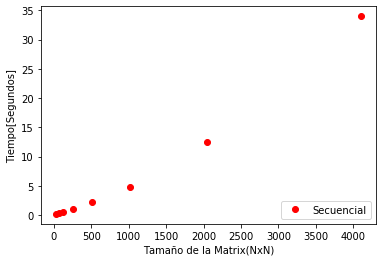

In [42]:
n_list=[32,64,128,256,512,1024,2048,4096]
secuencial=[0.209,0.301,0.530,1.08,2.21,4.83,12.5,34]
plt.plot(n_list,secuencial,'or',label="Secuencial") 
plt.xlabel("Tamaño de la Matrix(NxN)")
plt.ylabel("Tiempo[Segundos]")
plt.legend(loc='lower right')

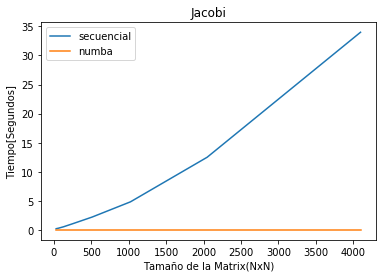

In [43]:
n_list=[32,64,128,256,512,1024,2048,4096]
secuencial=[0.209,0.301,0.530,1.08,2.21,4.83,12.5,34]
numba=[0.000000229,0.000000223,0.000000226,0.000000229,0.000000223,0.000000224,0.000000224,0.000000226]
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes. 
ax.plot(n_list, secuencial, label='secuencial')  # Plot more data on the axes...
ax.plot(n_list,numba, label='numba')  # ... and some more.
ax.set_xlabel('Tamaño de la Matrix(NxN)')  # Add an x-label to the axes.
ax.set_ylabel('Tiempo[Segundos]')  # Add a y-label to the axes.
ax.set_title("Jacobi")  # Add a title to the axes.
ax.legend()  # Add a legend.

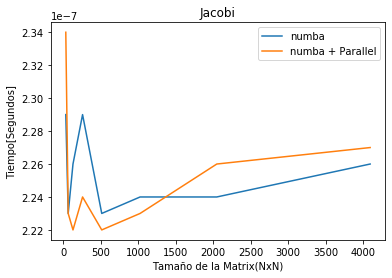

In [45]:
n_list=[32,64,128,256,512,1024,2048,4096]
secuencial=[0.209,0.301,0.530,1.08,2.21,4.83,12.5,34]
numba=[0.000000229,0.000000223,0.000000226,0.000000229,0.000000223,0.000000224,0.000000224,0.000000226]
numba_Parallel=[0.000000234,0.000000223,0.000000222,0.000000224,0.000000222,0.000000223,0.000000226,0.000000227]
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes. 
#ax.plot(n_list, secuencial, label='secuencial')  # Plot more data on the axes...
ax.plot(n_list,numba, label='numba')  # ... and some more.
ax.plot(n_list,numba_Parallel, label='numba + Parallel')  # ... and some more.
ax.set_xlabel('Tamaño de la Matrix(NxN)')  # Add an x-label to the axes.
ax.set_ylabel('Tiempo[Segundos]')  # Add a y-label to the axes.
ax.set_title("Jacobi")  # Add a title to the axes.
ax.legend()  # Add a legend.

### Con Gradiante Conjugado de Oscar

In [46]:
# Algoritmo sacado directo del pseudocódigo
def CG(A, b, x, error):
    r = b - A@x
    ρ = [0, r@r]
    i = 1
    res = b - A@x
    while  np.linalg.norm(res) > error: #i <= 952:#any(list(map(lambda x: x >= 0.005, list(sol - x)))):
        # Aquí iría la condición más chida de precondicionamiento
        ρ[0] = ρ[1] # Utilizamos sólo dos actualizaciones hacia atrás, por eso esto sí es una lista.
        ρ[1] = r@r # Aquí cambia cuando es precondicionada
        if i == 1:
            p = r
        else:
            β = ρ[1]/ρ[0]
            p = r + β*p
        q = A@p
        α = ρ[1]/(p@q)
        x = x + α*p
        r = r - α*q
        res = b - A@x
        i += 1
    return x, i

In [47]:
n_list=[32,64,128,256,512,1024,2048,4096]

for k in n_list:    
    n= k
    A = datasets.make_spd_matrix(n)  
    b = np.random.randn(n) 
    x = np.random.randn(n)
    print ('n= '+str(k))
    
    print ('Tiempo Secuencial:' )
    %timeit CG(A,b,x,0.00000001)
    
    print ('Tiempo Numba:' )
    CG_numba= jit(CG(A,b,x,0.00000001))
    %timeit CG_numba
    
    print ('Tiempo Numba+Parallel:' )
    CG_numba_parallel= jit(CG(A,b,x,0.00000001),nopython=True, parallel=True)
    %timeit CG_numba_parallel
    print (' ')
    print ('=======================  ')
    
 

n= 32
Tiempo Secuencial:
1.8 ms ± 721 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Tiempo Numba:
27.8 ns ± 0.0509 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Tiempo Numba+Parallel:
27.9 ns ± 0.00904 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
 
n= 64
Tiempo Secuencial:
2.57 ms ± 5.12 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Tiempo Numba:
27.8 ns ± 0.0568 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Tiempo Numba+Parallel:
27.8 ns ± 0.00901 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
 
n= 128
Tiempo Secuencial:
5.7 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Tiempo Numba:
28.2 ns ± 0.928 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Tiempo Numba+Parallel:
27.9 ns ± 0.0274 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
 
n= 256
Tiempo Secuencial:
12.1 ms ± 112 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Tiempo Numba:
28 ns ± 0

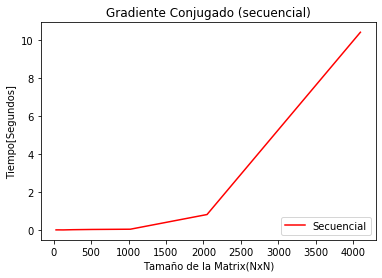

In [57]:
n_list=[32,64,128,256,512,1024,2048,4096]
secuencial=[0.0018,0.00257,0.00057,0.0121,0.0246,0.0376,0.81,10.4]
plt.plot(n_list,secuencial,'r',label="Secuencial") 
plt.xlabel("Tamaño de la Matrix(NxN)")
plt.ylabel("Tiempo[Segundos]")
plt.title("Gradiente Conjugado (secuencial)")
plt.legend(loc='lower right')

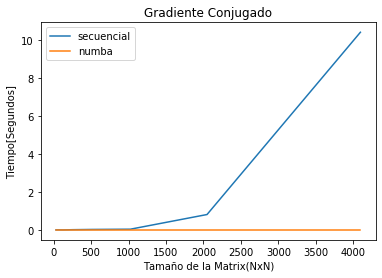

In [51]:
n_list=[32,64,128,256,512,1024,2048,4096]
secuencial=[0.0018,0.00257,0.00057,0.0121,0.0246,0.0376,0.81,10.4]
numba=[0.000000278,0.000000278,0.000000282,0.00000028,0.000000281,0.000000279,0.000000277,0.000000277]
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes. 
ax.plot(n_list, secuencial, label='secuencial')  # Plot more data on the axes...
ax.plot(n_list,numba, label='numba')  # ... and some more.
ax.set_xlabel('Tamaño de la Matrix(NxN)')  # Add an x-label to the axes.
ax.set_ylabel('Tiempo[Segundos]')  # Add a y-label to the axes.
ax.set_title("Gradiante Conjugado")  # Add a title to the axes.
ax.legend()  # Add a legend.

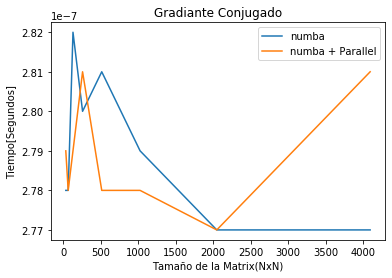

In [54]:
n_list=[32,64,128,256,512,1024,2048,4096] 
numba=[0.000000278,0.000000278,0.000000282,0.00000028,0.000000281,0.000000279,0.000000277,0.000000277]
numba_Parallel=[0.000000279,0.000000278,0.000000279,0.000000281,0.000000278,0.000000278,0.000000277,0.000000281]
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes. 
#ax.plot(n_list, secuencial, label='secuencial')  # Plot more data on the axes...
ax.plot(n_list,numba, label='numba')  # ... and some more.
ax.plot(n_list,numba_Parallel, label='numba + Parallel')  # ... and some more.
ax.set_xlabel('Tamaño de la Matrix(NxN)')  # Add an x-label to the axes.
ax.set_ylabel('Tiempo[Segundos]')  # Add a y-label to the axes.
ax.set_title("Gradiante Conjugado")  # Add a title to the axes.
ax.legend()  # Add a legend.

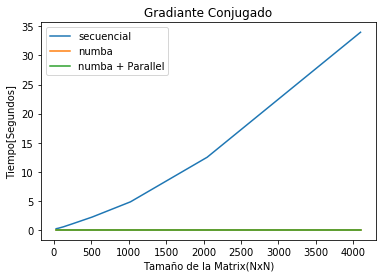

In [55]:
n_list=[32,64,128,256,512,1024,2048,4096]
secuencial=[0.209,0.301,0.530,1.08,2.21,4.83,12.5,34]
numba=[0.000000278,0.000000278,0.000000282,0.00000028,0.000000281,0.000000279,0.000000277,0.000000277]
numba_Parallel=[0.000000279,0.000000278,0.000000279,0.000000281,0.000000278,0.000000278,0.000000277,0.000000281]
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes. 
#ax.plot(n_list, secuencial, label='secuencial')  # Plot more data on the axes...
ax.plot(n_list, secuencial, label='secuencial')  # Plot more data on the axes...
ax.plot(n_list,numba, label='numba')  # ... and some more.
ax.plot(n_list,numba_Parallel, label='numba + Parallel')  # ... and some more.
ax.set_xlabel('Tamaño de la Matrix(NxN)')  # Add an x-label to the axes.
ax.set_ylabel('Tiempo[Segundos]')  # Add a y-label to the axes.
ax.set_title("Gradiante Conjugado")  # Add a title to the axes.
ax.legend()  # Add a legend.